In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 20}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)

# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)

In [3]:
def myBarPlot(df, x, y, hue="", xlim = "", ylim = "", xlabel = "", ylabel = "", loc='lower right', doplot = False, saveDir = "", saveImgName = ""):
    
    plt.figure(figsize=figsize)
    
    # don't change
    # =========================================================
    categories = df[x].unique()
    
    hues = []
    if hue:
        hues = df[hue].unique()
        hues.sort()
        # print(hues)
        
        # decide the bars location
        x_axis = np.arange(len(categories)) * (len(hues)*bar_width + (len(hues)-1)*bar_btw_space + bar_space)
        x_axis_offset = np.arange((len(hues)-1)*((bar_width/2)+(bar_btw_space/2))*(-1), (len(hues))*(bar_width/2), bar_width + bar_btw_space)
    else:
        x_axis = np.arange(len(categories)) * (bar_width + bar_space)
        
    # bar lists
    bars = []

    if hue:
        all_means = []
        all_stds = []
        all_cis = []
        for hue_value in hues:
            value_means = []
            value_stds = []
            value_cis = []
            for category in categories:
                filtered_df = df[df[x] == category]
                filtered_df = filtered_df[filtered_df[hue] == hue_value]
                
                mean = filtered_df[y].mean()
                
                # Calculate standard deviation
                std = filtered_df[y].std(ddof=1)  # use ddof=1 for sample standard deviation
                
                # Calculate the 95% confidence interval using the t-distribution
                n = len(df)
                t_value = stats.t.ppf(0.975, n-1)  # use 0.975 for a two-tailed test
                ci_offset = t_value * (std / (n**0.5)) * 2
                
                value_means.append(mean)
                value_stds.append(std)
                value_cis.append(ci_offset)

            all_means.append(value_means)
            all_stds.append(value_stds)
            all_cis.append(value_cis)
        
        print(f"mean: {all_means}")
        print(f"ci: {all_cis}")

        for idx in range(len(hues)):
            bars.append(plt.bar(x_axis+x_axis_offset[idx], all_means[idx], yerr=all_cis[idx], \
                                error_kw=dict(lw=err_lw, capsize=err_capsize, capthick=err_capthick, ecolor=errorbar_color), \
                                width=bar_width, color=color_palette[idx]))

    else:
        value_means = []
        value_stds = []
        value_cis = []
        for category in categories:
            filtered_df = df[df[x] == category]
            
            mean = filtered_df[y].mean()
            
            # Calculate standard deviation
            std = filtered_df[y].std(ddof=1)  # use ddof=1 for sample standard deviation
            
            # Calculate the 95% confidence interval using the t-distribution
            n = len(df)
            t_value = stats.t.ppf(0.975, n-1)  # use 0.975 for a two-tailed test
            ci_offset = t_value * (std / (n**0.5)) * 2
            
            value_means.append(mean)
            value_stds.append(std)
            value_cis.append(ci_offset)
        
        print(f"mean: {value_means}")
        print(f"ci: {value_cis}")
        
        bars.append(plt.bar(x_axis, value_means, yerr=value_cis, \
                            error_kw=dict(lw=err_lw, capsize=err_capsize, capthick=err_capthick, ecolor=errorbar_color), \
                            width=bar_width, color=color_palette[0]))

    plt.xticks(x_axis, categories)
    
    # =========================================================
    
    # Showing setting
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if hue:
        plt.legend(bars, hues, title='', loc=loc)
    # plt.title("Template") // usually don't use in paper
    
    if doplot:
        # create saveDir
        if saveDir:
            saveDir.mkdir(exist_ok=True, parents=True)
        else:
            saveDir = Path(".")
        plt.savefig(f'{saveDir}/{saveImgName}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveDir}/{saveImgName}.png', dpi=300, pad_inches=0, bbox_inches='tight')
                        
    # Show the plot
    plt.show()


mean: [27.91, 24.95, 26.84, 26.34, 24.68]
ci: [2.440510935668952, 2.516685584318424, 2.438033275506282, 2.4103036018749524, 2.305076802098602]


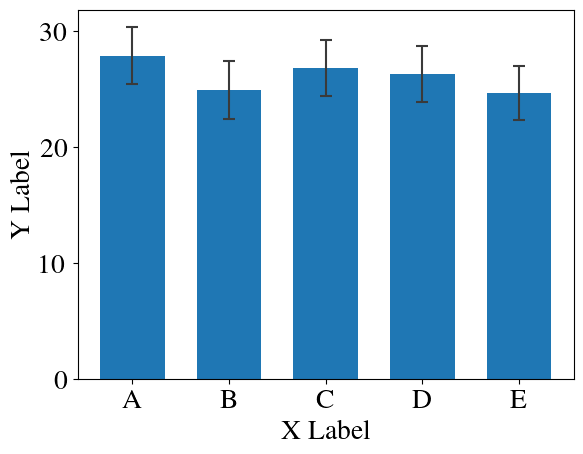

mean: [[28.62962962962963, 29.166666666666668, 24.7, 27.892857142857142, 23.586206896551722], [27.791666666666668, 24.904761904761905, 26.5, 27.736842105263158, 24.5], [24.38095238095238, 20.93103448275862, 28.814814814814813, 24.896551724137932, 24.0], [29.964285714285715, 26.25, 26.82608695652174, 25.166666666666668, 27.08695652173913]]
ci: [[2.3370044399779473, 1.999327599483925, 2.4576524924914787, 2.5485285134482476, 2.2692495628767064], [2.536002546098551, 2.6364910137101316, 2.2351393107354816, 2.2134339809993486, 2.4977848959202], [2.6056052386506923, 2.3892415952120825, 2.531628713970737, 2.3019791739042272, 2.448515930212848], [2.3709698782382254, 2.748628534086787, 2.662797638261431, 2.6135385758891143, 2.0920031699438253]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


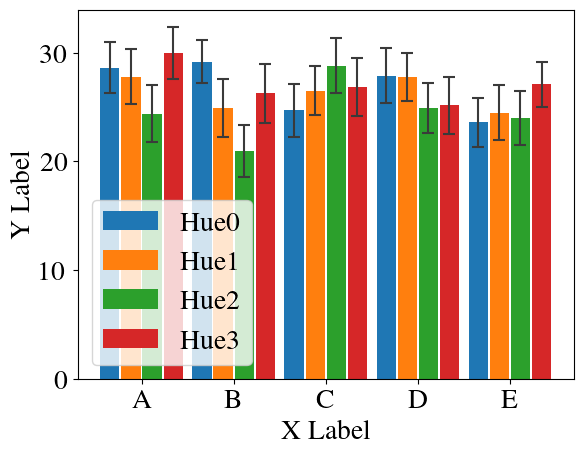

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mean: [[20.11111111111111, 23.5, 21.95, 25.535714285714285, 23.96551724137931], [24.958333333333332, 20.714285714285715, 27.633333333333333, 23.94736842105263, 24.333333333333332], [20.428571428571427, 26.482758620689655, 21.074074074074073, 23.620689655172413, 23.6], [25.678571428571427, 24.71875, 23.47826086956522, 29.75, 27.434782608695652]]
ci: [[2.427342635438984, 2.5779518673677333, 2.359380864617965, 2.8086320146102626, 2.647851638800084], [2.8821887126595356, 2.6042221534913166, 2.4725281746669, 2.2247459771453664, 2.664406915919603], [2.360667244080901, 2.774423977726303, 2.7096946754257996, 2.432011572307121, 2.7218612365785306], [2.479242531792723, 2.407941154850552, 2.6037436985870928, 2.5180816066242944, 2.912635415407023]]


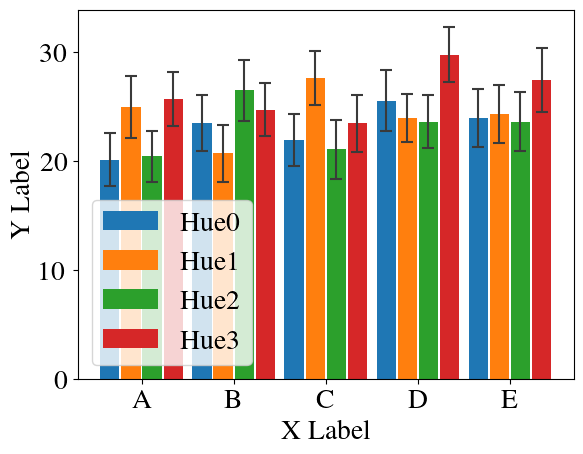

In [4]:
csvFilePath = Path("sample_data")/"data_with_hue.csv"
df = pd.read_csv(csvFilePath)

saveFigDir = Path("figs")
saveFigDir.mkdir(parents=True, exist_ok=True)

# barplot without hue, Y is Value1 (just X and Y)
myBarPlot(
        df=df, 
        x="Category", y="Value1",
        xlim = "", ylim = "", 
        xlabel = "X Label", ylabel = "Y Label", 
        loc='lower left', 
        doplot = True, 
        saveDir = saveFigDir, saveImgName = "without_hue_value1"
        )

# barplot with hue, Y is Value1
myBarPlot(
        df=df, 
        x="Category", y="Value1", hue="Hue", 
        xlim = "", ylim = "", 
        xlabel = "X Label", ylabel = "Y Label", 
        loc='lower left', 
        doplot = True, 
        saveDir = saveFigDir, saveImgName = "with_hue_value1"
        )

# barplot with hue, Y is Value2
myBarPlot(
        df=df, 
        x="Category", y="Value2", hue="Hue",
        xlim = "", ylim = "", 
        xlabel = "X Label", ylabel = "Y Label", 
        loc='lower left', 
        doplot = True, 
        saveDir = saveFigDir, saveImgName = "with_hue_value2"
        )
